In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

color_list = ['#ff9999', '#8fd9b6', '#BFBBD9'
              , '#FA8174', '#81B1D2', '#FDB462'
              , '#B3DE69', '#BC82BD', '#CCEBC4']

In [2]:
# 성별 확진자수 데이터 불러오기
gender = '/content/drive/MyDrive/covid19/DATATHON01/해커톤 코로나 데이터셋/TimeGender.csv'
gender = pd.read_csv(gender)
gender

,date,time,sex,confirmed,deceased
0,2020-03-02,0,male,1591,13
1,2020-03-02,0,female,2621,9
2,2020-03-03,0,male,1810,16
3,2020-03-03,0,female,3002,12
4,2020-03-04,0,male,1996,20
...,...,...,...,...,...
237,2020-06-28,0,female,7265,131
238,2020-06-29,0,male,5470,151
239,2020-06-29,0,female,7287,131
240,2020-06-30,0,male,5495,151


In [3]:
# 서울의 유동인구 데이터 불러오기
float_path = '/content/drive/MyDrive/covid19/DATATHON01/해커톤 코로나 데이터셋/SeoulFloating.csv'
ft= pd.read_csv(float_path)
ft

,date,hour,birth_year,sex,province,city,fp_num
0,2020-01-01,0,20,female,Seoul,Dobong-gu,19140
1,2020-01-01,0,20,male,Seoul,Dobong-gu,19950
2,2020-01-01,0,20,female,Seoul,Dongdaemun-gu,25450
3,2020-01-01,0,20,male,Seoul,Dongdaemun-gu,27050
4,2020-01-01,0,20,female,Seoul,Dongjag-gu,28880
...,...,...,...,...,...,...,...
1084795,2020-05-31,21,40,female,Seoul,Dobong-gu,27620
1084796,2020-05-31,21,40,female,Seoul,Songpa-gu,56560
1084797,2020-05-31,21,50,female,Seoul,Gangdong-gu,38960
1084798,2020-05-31,22,60,female,Seoul,Guro-gu,25420


In [4]:
# 변수지정
female, male = ft[ft.sex=='female'],ft[ft.sex=='male']

female

,date,hour,birth_year,sex,province,city,fp_num
0,2020-01-01,0,20,female,Seoul,Dobong-gu,19140
2,2020-01-01,0,20,female,Seoul,Dongdaemun-gu,25450
4,2020-01-01,0,20,female,Seoul,Dongjag-gu,28880
6,2020-01-01,0,20,female,Seoul,Eunpyeong-gu,27750
8,2020-01-01,0,20,female,Seoul,Gangbuk-gu,19490
...,...,...,...,...,...,...,...
1084793,2020-05-31,20,70,female,Seoul,Jongno-gu,9140
1084795,2020-05-31,21,40,female,Seoul,Dobong-gu,27620
1084796,2020-05-31,21,40,female,Seoul,Songpa-gu,56560
1084797,2020-05-31,21,50,female,Seoul,Gangdong-gu,38960


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


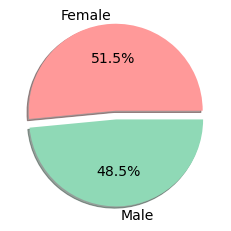

In [5]:
# 성별 유동인구 파악

ratio = [[female.fp_num.sum(), male.fp_num.sum()]]
labels = ['Female','Male']
colors = ['#ff9999', '#8fd9b6']
explode = [0.05, 0.05]

plt.pie(ratio, labels=labels, autopct='%.1f%%',colors=colors,shadow=True,explode=explode,textprops={'fontsize': 14})
plt.show()

fig,ax = plt.subplots(figsize=(11,11))
plt.title('Floating Population by sex')
circle = plt.Circle((0,0),0.79,color='white')
plt.pie([female.fp_num.sum()
         , male.fp_num.sum()]
        , labels=['female', 'male']
        , autopct='%.2f%%'
        , startangle=90
        , counterclock=False)
p=plt.gcf()
p.gca().add_artist(circle)
plt.show()

In [6]:
# 데이터프레임 합치기
gender = gender[['sex',	'confirmed'	]]
ft = ft[['sex','fp_num']]

gender_ft = pd.merge(gender,ft,on='sex')
gender_ft

,sex,confirmed,fp_num
0,male,1591,19950
1,male,1591,27050
2,male,1591,30350
3,male,1591,27910
4,male,1591,21940
...,...,...,...
131260795,female,7305,9140
131260796,female,7305,27620
131260797,female,7305,56560
131260798,female,7305,38960


In [7]:
# 성별을 기준으로 groupby
gender_ft = gender_ft.groupby(['sex']).mean()
gender_ft

,confirmed,fp_num
sex,,
female,6177.413223,28256.976604
male,4245.677686,26596.953872


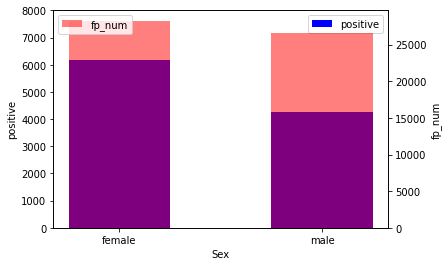

In [8]:
# 성별 유동인구와 확진자수 파악
x = gender_ft.index
y1 = gender_ft['confirmed']
y2 = gender_ft['fp_num']


fig, ax1 = plt.subplots()
ax1.bar(x, y1, color='b',width=0.5, label='positive')
plt.ylim([0,8000])
ax1.set_xlabel('Sex')
ax1.set_ylabel('positive')


ax2 = ax1.twinx()
ax2.set_ylabel('fp_num')
ax2.bar(x, y2, color='red',alpha=0.5,width=0.5, label='fp_num')
ax2.legend()

ax1.legend(loc='best')
ax2.legend(loc='upper left')

plt.show()
